In [42]:
import os
import sys
import fitsio
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import matplotlib as mpl

from   astropy.table import Table
from   poisson import fillfactor_expectation

In [2]:
cwd = os.getcwd()
code_root = '/'.join(x for x in cwd.split('/')[:-2])

sys.path.append(code_root)
sys.path.append(os.environ['HOME'])

print(cwd)
print(code_root)

/cosma/home/durham/dc-wils7/DESI/docs/nb
/cosma/home/durham/dc-wils7/DESI


In [3]:
import pubplot

from   cosmo         import cosmo, fsky
from   cartesian     import rotate
from   findfile      import findfile
# from   poisson     import fillfactor_expectation, fillfactor_poisson

In [4]:
survey  = 'gama'
field   = 'G15'
dryrun  = False
realz   = 0
version = 'GAMA4'

In [5]:
nbar   = 2.
radius = 8.

In [6]:
fpath = findfile(ftype='randoms', field=field, dryrun=dryrun, survey=survey, version=version)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.01882456792495559),
             ('ZMAX', 0.2715130300226329),
             ('DZ', 0.0001),
             ('NRAND', 1389796),
             ('FIELD', 'G15'),
             ('AREA', 60.0),
             ('VOL', 2779592.092906396),
             ('RAND_DENS', 0.4999999832877643),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 364),
             ('PREFIX', 'randoms'),
             ('REALZ', 0),
             ('FPATH',
              '/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_G15_0.fits'),
             ('NRAND8', 1072.330256583243),
             ('NRAND8_PERR', 32.74645410702116),
             ('EXTNAME', 'RANDOMS')])

In [7]:
bound = Table.read(fpath, 'BOUNDARY')
bound

<Table length=540000>
     BOUND_RA           BOUND_DEC                Z                   V          BOUNDID FIELD  ...     CARTESIAN_Y         CARTESIAN_Z       ROTCARTESIAN_X      ROTCARTESIAN_Y      ROTCARTESIAN_Z  
     float64             float64              float64             float64        int64  bytes3 ...       float64             float64            float64             float64             float64      
------------------ -------------------- -------------------- ------------------ ------- ------ ... ------------------- ------------------- ------------------ ------------------- -------------------
             223.5  0.40063778486427637  0.05542830219275212  25994.50897891986       0    G15 ... -113.17357997955371  1.1496594200335213  163.5148911511191   17.18570750523301 -0.2772696396877312
             223.5   0.9719219102434473  0.02410020010177462 1183.1522362311023       1    G15 ... -49.500557425539405  1.2199675674428856  71.52540814262431   7.516790592071061  0.5958212412977677
             211.5   2.7601640018222424  0.11671435815635285  242630.6639378337       2    G15 ... -178.48960182467297  16.469340782843783 339.86725254324597  -35.70774170093898  13.503991329401643
             211.5     1.31087012077912  0.06861597879441203  49887.90023456125       3    G15 ... -106.04375280210274   4.644220222325806 201.87614138533132 -21.214585585636527  2.8826506707565827
             223.5   2.6954966166290735  0.18606407330666155  944648.5274568212       4    G15 ...  -369.5380787129258  25.274566716321353   534.101976965205  56.115334815364776  20.614491791263923
             211.5   1.9719885776508628  0.16846833788775528  708747.5327353809       5    G15 ...  -255.0456300433559  16.806840561915152  485.5811190337055  -51.02315981682304  12.569878311777279
             211.5   1.7307081189790998    0.069272976095836  51345.74326226799       6    G15 ...  -107.0244366433077   6.189152218588278  203.7561823221181 -21.410776315707338   4.411234626838994
             211.5 -0.09175657507305623  0.25276333780507176 2270179.3114881213       7    G15 ... -376.04985447618867 -1.1525910864317428  715.7346326622757  -75.23066292400273  -7.398756487750646
             223.5  -0.5835953732819252   0.1331589444573795 357214.58657202777       8    G15 ...  -267.6760740309231 -3.9609702217112845  386.6841248477313  40.647319942301294  -7.335662283394658
             211.5  -1.8839431549239436  0.16972617887509692  724192.9334838142       9    G15 ... -256.89552963127096 -16.172351083414497  488.8142831200254  -51.39324152456774  -20.43878452346027
             223.5  -0.3938154868387427  0.16374301114289821   652611.354654218      10    G15 ...  -327.0885699431962  -3.266105147104398 472.52498985674333   49.66926461427022  -7.389892629425438
               ...                  ...                  ...                ...     ...    ... ...                 ...                 ...                ...                 ...                 ...
222.88932654807275  -0.8380982010911231  0.27151303002263294 2779592.0929063964  539988    G15 ...  -523.9510505475281  -11.26190816159099  766.3240148926311   72.30694264456764 -17.949945359725486
    217.8299369993   0.7317525750286116 0.018824567924955588                0.0  539989    G15 ...  -34.48681065266453  0.7181766318416459  56.23292790990078  0.3237964007409424 0.22746665149149192
216.00645007166747   -1.054822831364793 0.018824567924955588                0.0  539990    G15 ...  -33.05322320803166 -1.0352227447708575 56.194515072030285 -1.4654660922512832 -1.5256642679812613
213.79349214991277  -1.4155490616562405  0.27151303002263294 2779592.0929063964  539991    G15 ...  -428.1092163398311 -19.020122274083864  767.8968107218603  -49.75789192735874 -25.722180473751504
213.57975644173825   1.5754841720463562 0.018824567924955588                0.0  539992    G15 ... -31.091288843893153  1.5461019616041058  56.09289053292299 -3.8431625329772956  1.0566455949886695
212.60107890087667

In [8]:
fpath = findfile(ftype='randoms_n8', field=field, dryrun=dryrun, survey=survey, version=version)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.01882456792495559),
             ('ZMAX', 0.2715130300226329),
             ('DZ', 0.0001),
             ('NRAND', 1389796),
             ('FIELD', 'G15'),
             ('AREA', 60.0),
             ('VOL', 2779592.092906396),
             ('RAND_DENS', 0.4999999832877643),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 364),
             ('PREFIX', 'randoms'),
             ('REALZ', 0),
             ('FPATH',
              '/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_G15_0.fits'),
             ('NRAND8', 1072.330256583243),
             ('NRAND8_PERR', 32.74645410702116),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0),
             ('IMMUTABLE', 'FALSE')])

In [9]:
fpath = findfile(ftype='randoms_bd', field=field, dryrun=dryrun, survey=survey, version=version)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.01882456792495559),
             ('ZMAX', 0.2715130300226329),
             ('DZ', 0.0001),
             ('NRAND', 1389796),
             ('FIELD', 'G15'),
             ('AREA', 60.0),
             ('VOL', 2779592.092906396),
             ('RAND_DENS', 0.4999999832877643),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 364),
             ('PREFIX', 'randoms'),
             ('REALZ', 0),
             ('FPATH',
              '/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_G15_0.fits'),
             ('NRAND8', 1072.330256583243),
             ('NRAND8_PERR', 32.74645410702116),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0),
             ('IMMUTABLE', 'FALSE')])

In [10]:
rand

<Table length=1389796>
    RANDOM_RA           RANDOM_DEC               Z                  V           RANDID FIELD  GAMA_FIELD ... IN_D8LUMFN RAND_N8     FILLFACTOR         BOUND_DIST     BOUNDID FILLFACTOR_POISSON
     float64             float64              float64            float64        int64  bytes3   bytes3   ...   int64     int32       float64            float64        int64       float64      
------------------ -------------------- ------------------- ------------------ ------- ------ ---------- ... ---------- ------- ------------------ ------------------ ------- ------------------
215.58921788555918  -0.7481600451131971 0.26432010837242276  2577657.191056184  905560    G15        G15 ...          0    8564                1.0 16.410292656827718  454612 0.9982931969213715
215.05118643723037  -0.9778865900977778 0.21222092965741846  1380066.486376444  376874    G15        G15 ...          0    8746                1.0  10.87925760077957  443859 1.0195086758844365
 212.0042885125078  -1.6635816711995006  0.2607696294433418  2480951.441838437  102191    G15        G15 ...          0    7191 0.8382445561725341  4.374656014789756  510145 0.8382445561725341
222.82507727526314  -0.6922006665109753  0.2489633955244883 2175755.2435752237  983720    G15        G15 ...          0    8381                1.0  8.359597878610629  456895 0.9769611493925753
 219.6683472598961   0.3219148658505215 0.24875717115610776 2170645.2201083335 1052166    G15        G15 ...          0    8432                1.0 28.725213983068024  399677 0.9829061462448627
215.38132365544664   2.6346349254628447  0.1937148522752761 1062086.5677947116  856636    G15        G15 ...          0    7043 0.8209924084443273  3.567428496706478  487328 0.8209924084443273
220.04586953653762   0.8131880722533585 0.24603279688086202 2103841.3627693295 1333218    G15        G15 ...          0    8548                1.0 26.772368990077833  525865 0.9964280998696735
219.84692758476305   2.8617605479357064 0.17558849076918479  800098.3069092756  235670    G15        G15 ...          0    5221  0.608604481682214 1.3285365375176763  440500  0.608604481682214
214.17978870016563  0.25206732769821266 0.26910495622865593  2711642.696106192  181536    G15        G15 ...          0    8446 0.9845381061650985  6.428262869015694  361716 0.9845381061650985
 216.2355955278775  -0.4312473517407922 0.24275916179948645  2025290.081918773  639081    G15        G15 ...          0    8585                1.0 18.973020744924703  404245 1.0007411368017252
 213.1206085293425  -1.1115782831109557  0.2323683043875975  1788225.815920831  532577    G15        G15 ...          0    8624                1.0 10.305301101770242  410440 1.0052873108652391
               ...                  ...                 ...                ...     ...    ...        ... ...        ...     ...                ...                ...     ...                ...
214.04504253139498   -1.770091224496076  0.2609888690662162  2486856.268243155  960447    G15        G15 ...          0    6627 0.7724998851001785 3.0304869059664306  420153 0.7724998851001785
215.76303956412067   -0.517717331550764 0.21481372751071856 1428887.9643745848  813563    G15        G15 ...          0    8521                1.0   15.9546281907207  442621  0.993280748594933
215.43641420830053  0.22415394304532346  0.1736334582990595  774622.7686886358 1073678    G15        G15 ...          0    8738                1.0 19.526245429540705  377948 1.0185761273585876
219.54389223188912   2.5211721481468268 0.18263791102479535  896386.4486482756  130227    G15        G15 ...          0    7472 0.8710003231429808  4.459137460390815  505450 0.8710003231429808
220.34224589218329  -0.7818054082405691 0.20075791450326508  1176901.661836778 1146488    G15        G15 ...          0    8594                1.0 12.337929238729524  354961 1.0017902538933052
220.29526898115157  -0.8191708115992244 0.19685819234375185 1112404.2968285526  900522    G15        G15 ...         

In [11]:
fpath = findfile(ftype='randoms_bd_ddp_n8', field=field, dryrun=dryrun, survey=survey, version=version)

rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.01882456792495559),
             ('ZMAX', 0.2715130300226329),
             ('DZ', 0.0001),
             ('NRAND', 1389796),
             ('FIELD', 'G15'),
             ('AREA', 60.0),
             ('VOL', 2779592.092906396),
             ('RAND_DENS', 0.4999999832877643),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 364),
             ('PREFIX', 'randoms'),
             ('REALZ', 0),
             ('FPATH',
              '/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_G15_0.fits'),
             ('NRAND8', 1072.330256583243),
             ('NRAND8_PERR', 32.74645410702116),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0),
             ('IMMUTABLE', 'FALSE'),
             ('GOLD_NGAL', 121975),
             ('RLIM', 19.8),
             ('RMAX', 12.0),
             ('MAX_SEP', 70.0),
             ('THETA_DEF', 'Z_THETA_QCOLOR'),
             ('DDP1_ZMIN', 0.0190299991518259),
             ('D

Text(0, 0.5, 'DEC [deg.]')

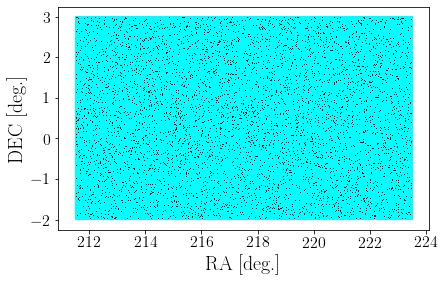

In [12]:
pl.plot(rand['RANDOM_RA'], rand['RANDOM_DEC'], marker=',', lw=0.0, c='k')
pl.plot(bound['BOUND_RA'], bound['BOUND_DEC'], marker=',', lw=0.0, c='cyan')
pl.xlabel('RA [deg.]')
pl.ylabel('DEC [deg.]')

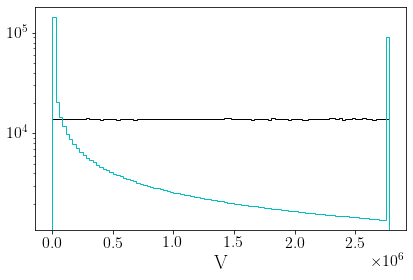

In [13]:
_ = pl.hist(rand['V'], bins=100, histtype='step', color='k')
_ = pl.hist(bound['V'], bins=100, histtype='step', color='c')

pl.xlabel('V')
pl.yscale('log')

(0.0, 0.6)

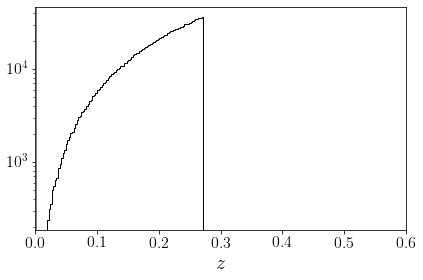

In [14]:
_ = pl.hist(rand['Z'], bins=100, histtype='step', color='k')

pl.axvline(300. / 2.9979e5, lw=0.5, c='k')

pl.yscale('log')
pl.xlabel('$z$')

pl.xlim(0.0, 0.6)

In [15]:
pos       = np.c_[rand['ROTCARTESIAN_X'], rand['ROTCARTESIAN_Y'], rand['ROTCARTESIAN_Z']]
pos_bound = np.c_[bound['ROTCARTESIAN_X'], bound['ROTCARTESIAN_Y'], bound['ROTCARTESIAN_Z']]

Text(0, 0.5, '$y$')

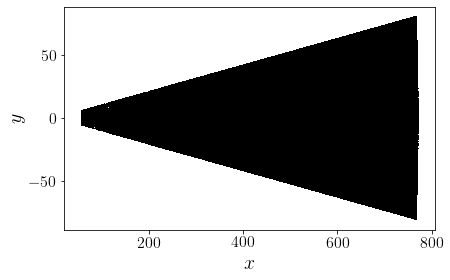

In [16]:
pl.plot(pos[::1,0], pos[::1,1], marker=',', lw=0.0, c='k')

pl.xlabel('$x$')
pl.ylabel('$y$')

Text(0, 0.5, '$y$')

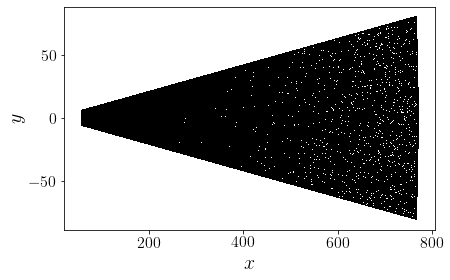

In [17]:
pl.plot(pos_bound[:,0], pos_bound[:,1], marker=',', lw=0.0, c='k')
pl.xlabel('$x$')
pl.ylabel('$y$')

(0.0, 1000.0)

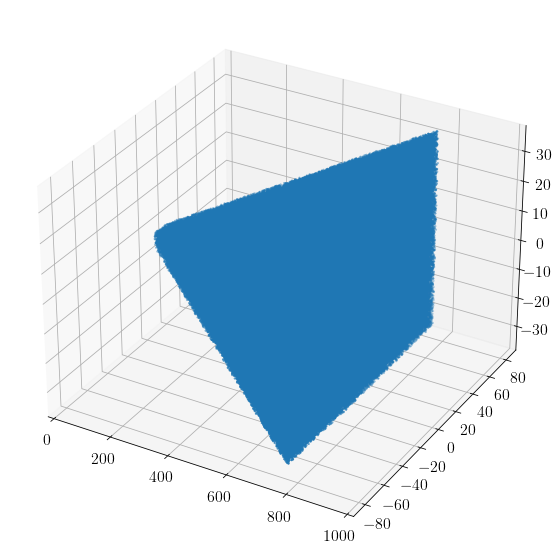

In [18]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(pos[::1, 0],\
           pos[::1, 1],\
           pos[::1, 2],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

(0.0, 1000.0)

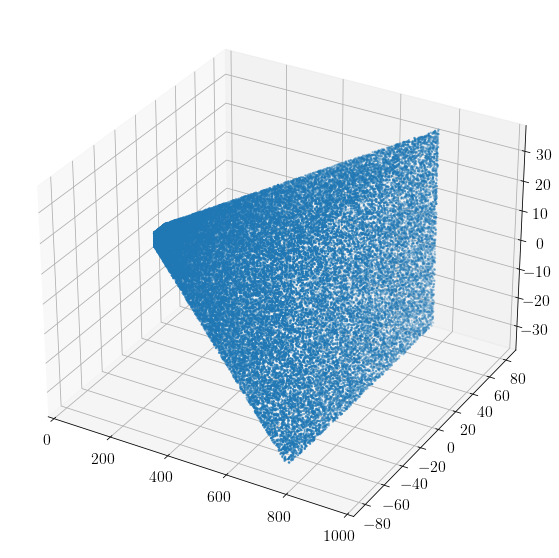

In [19]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(pos_bound[:,0][::10],\
           pos_bound[:,1][::10],\
           pos_bound[:,2][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

In [20]:
np.mean(rand['V'] < np.percentile(rand['V'], 1.))

0.010000028781202422

In [21]:
rand['RAND_N8'].data.min(), rand['RAND_N8'].data.max()

(1033, 8988)

(50.0, 9500.0)

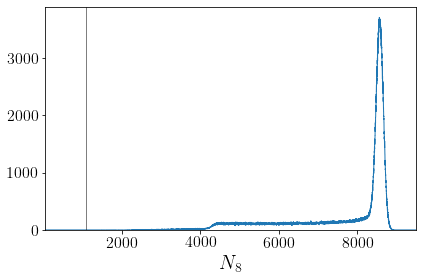

In [22]:
_ = pl.hist(rand['RAND_N8'], bins=np.arange(0, 9500, 1), histtype='step')

pl.axvline(rand.meta['NRAND8'], c='k', lw=0.5)

pl.xlabel(r'$N_8$')
pl.xlim(50., 9500.)

In [23]:
# 100. * np.sqrt(rand.meta['NRAND8']) / rand.meta['NRAND8']

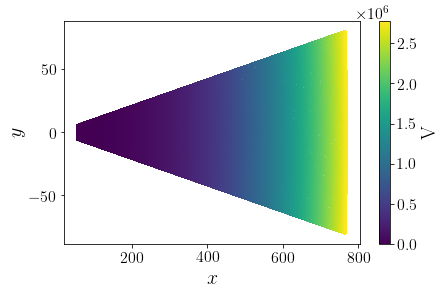

In [24]:
# isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(pos_bound[:,0], pos_bound[:,1], lw=0.0, c=bound['V'], s=2)
pl.xlabel('$x$')
pl.ylabel('$y$')
pl.colorbar(label='V')

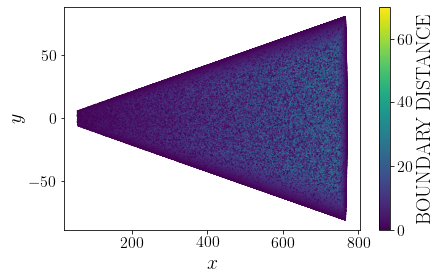

In [25]:
pl.scatter(pos[:,0], pos[:,1], lw=0.0, c=rand['BOUND_DIST'], s=2, vmin=0., vmax=70.)
pl.xlabel('$x$')
pl.ylabel('$y$')
pl.colorbar(label='BOUNDARY DISTANCE')

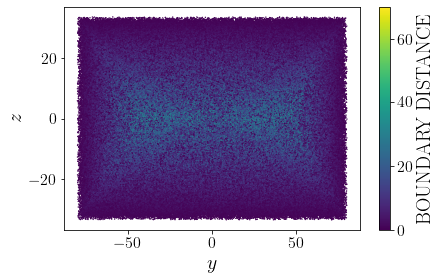

In [26]:
pl.scatter(pos[:,1], pos[:,2], lw=0.0, c=rand['BOUND_DIST'], s=2, vmin=0., vmax=70.)
pl.xlabel('$y$')
pl.ylabel('$z$')
pl.colorbar(label='BOUNDARY DISTANCE')

In [27]:
# pl.scatter(pos_bound[:,0], pos_bound[:,1], lw=0.0, c=bound['RAND_N8'], vmin=0, vmax=1500, s=2)
# pl.xlabel('$x$')
# pl.ylabel('$y$')
# pl.colorbar(label=r'$N_8$')

(0.2, 1.1)

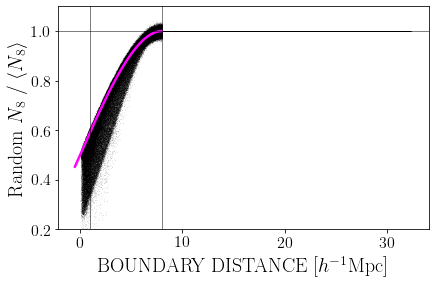

In [54]:
bds = np.arange(-0.5, 8., 0.01)

pl.scatter(rand['BOUND_DIST'], rand['FILLFACTOR'], marker='.', lw=0.0, s=2, alpha=0.1, c='k')

pl.plot(bds, fillfactor_expectation(bds, radius=8., nbar=1.), lw=2.5, c='magenta')

pl.xlabel('BOUNDARY DISTANCE [$h^{-1}$Mpc]')
pl.ylabel(r'Random $N_8 \ / \ \langle N_8 \rangle$')

pl.axhline(1.00, c='k', lw=0.5)

pl.axvline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.ylim(0.2, 1.1)

(0.2, 1.1)

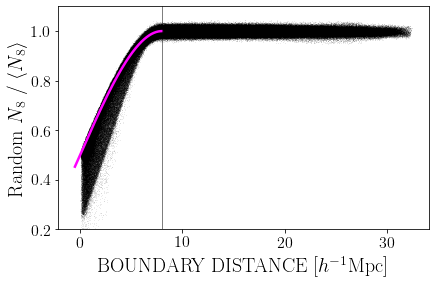

In [55]:
pl.scatter(rand['BOUND_DIST'], rand['FILLFACTOR_POISSON'], marker='.', lw=0.0, s=2, alpha=0.1, c='k')

bds = np.arange(-0.5, 8., 0.01)
pl.plot(bds, fillfactor_expectation(bds, radius=8., nbar=1.), lw=2.5, c='magenta')

pl.xlabel('BOUNDARY DISTANCE [$h^{-1}$Mpc]')
pl.ylabel(r'Random $N_8 \ / \ \langle N_8 \rangle$')

pl.axvline(8.00, c='k', lw=0.5)

pl.ylim(0.2, 1.1)

Text(0.5, 0, 'BOUND_DIST [$h^{-1}$Mpc]')

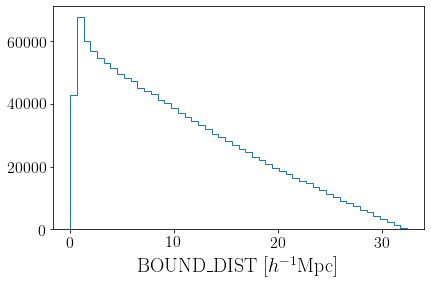

In [29]:
_ = pl.hist(rand['BOUND_DIST'], bins=50, histtype='step')
pl.xlabel('BOUND_DIST [$h^{-1}$Mpc]')

In [30]:
fpath = findfile(ftype='ddp_n8', dryrun=dryrun, survey=survey, version=version)
gold  = Table.read(fpath)
gold.meta

OrderedDict([('AREA', 180.0),
             ('GOLD_NGAL', 121975),
             ('IMMUTABLE', 'False'),
             ('RLIM', 19.8),
             ('RMAX', 12.0),
             ('MAX_SEP', 70.0),
             ('THETA_DEF', 'Z_THETA_QCOLOR'),
             ('DDP1_ZMIN', 0.0190299991518259),
             ('DDP1_ZMAX', 0.2715100049972534),
             ('DDP1_VZ', 8338406.912746496),
             ('DDP1ZLIMS_NGAL', 121975),
             ('DDP1_NGAL', 50872),
             ('DDP1_DENS', 0.00610092557635135),
             ('DDP2_ZMIN', 0.0188400000333786),
             ('DDP2_ZMAX', 0.1936399936676025),
             ('DDP2_VZ', 3179460.348095798),
             ('DDP2ZLIMS_NGAL', 76273),
             ('DDP2_NGAL', 33593),
             ('DDP2_DENS', 0.01056562948492787),
             ('DDP3_ZMIN', 0.01882999949157238),
             ('DDP3_ZMAX', 0.1015100032091141),
             ('DDP3_VZ', 482216.0515798731),
             ('DDP3ZLIMS_NGAL', 20474),
             ('DDP3_NGAL', 9269),
             (

In [31]:
fpath = findfile(ftype='randoms_bd_ddp_n8', field=field, dryrun=dryrun, survey=survey, version=version, prefix='randoms_ddp1')

rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.0190299991518259),
             ('ZMAX', 0.2715100049972534),
             ('DZ', 0.0001),
             ('NRAND', 1389734),
             ('FIELD', 'G15'),
             ('AREA', 60.0),
             ('VOL', 2779468.970915499),
             ('RAND_DENS', 0.4999998253415475),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 364),
             ('PREFIX', 'randoms_ddp1'),
             ('REALZ', 0),
             ('FPATH',
              '/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_ddp1_G15_0.fits'),
             ('NRAND8', 1072.329917842217),
             ('NRAND8_PERR', 32.74644893484204),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0),
             ('IMMUTABLE', 'FALSE'),
             ('GOLD_NGAL', 121975),
             ('RLIM', 19.8),
             ('RMAX', 12.0),
             ('MAX_SEP', 70.0),
             ('THETA_DEF', 'Z_THETA_QCOLOR'),
             ('DDP1_ZMIN', 0.0190299991518259),
       

In [32]:
pos       = np.c_[rand['ROTCARTESIAN_X'], rand['ROTCARTESIAN_Y'], rand['ROTCARTESIAN_Z']]
pos

array([[ 6.97604749e+02,  8.63820073e+00,  5.60002440e+00],
       [ 6.96410208e+02,  3.86731936e+01,  9.56172280e+00],
       [ 6.91688019e+02,  6.33233453e+01,  4.30667009e-01],
       ...,
       [ 4.59623462e+02, -2.53761365e+01,  1.71801053e-01],
       [ 6.26218211e+02,  2.66698113e+01, -1.55900861e+00],
       [ 7.59274614e+02, -1.19862147e+01, -4.80279737e+00]])

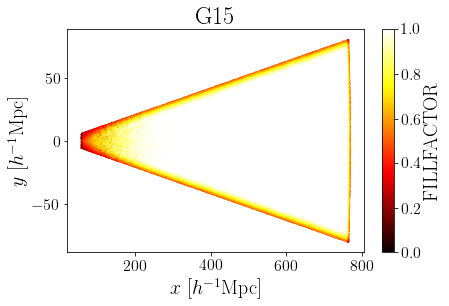

In [33]:
fills     = rand['FILLFACTOR'].data
pos_slice = pos

fills     = fills[np.abs(pos_slice[:,2]) < 5.]
pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
plt.scatter(pos_slice[:,0],\
            pos_slice[:,1],\
            c=fills,\
            marker='.',\
            lw=0.0,\
            s=4,\
            vmin=0.,\
            vmax=1.,\
            cmap='hot')

pl.xlabel('$x$ [$h^{-1}$Mpc]')
pl.ylabel('$y$ [$h^{-1}$Mpc]')

pl.colorbar(label='FILLFACTOR')
    
plt.title('{}'.format(field))
plt.show()

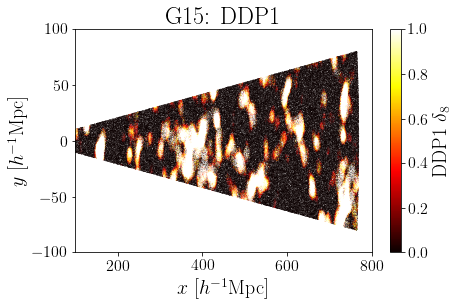

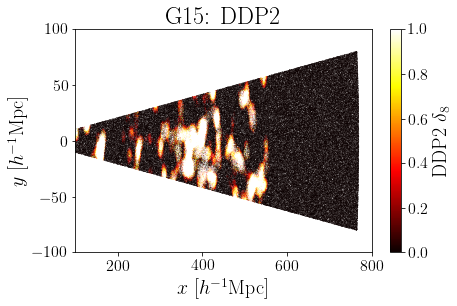

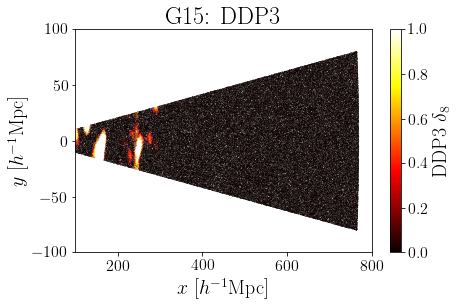

In [34]:
for idx in np.arange(1, 4, 1):
    fills     = rand['DDP{}_DELTA8'.format(idx)].data
    pos_slice = pos

    fills     = fills[np.abs(pos_slice[:,2]) < 5.]
    pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
    plt.scatter(pos_slice[:,0],\
                pos_slice[:,1],\
                c=fills,\
                marker='.',\
                lw=0.0,\
                s=1,\
                vmin=0.,\
                vmax=1.,\
                cmap='hot')
    
    pl.xlabel('$x$ [$h^{-1}$Mpc]')
    pl.ylabel('$y$ [$h^{-1}$Mpc]')

    pl.xlim(100.,  800.)
    pl.ylim(-100., 100.)
    
    pl.colorbar(label='DDP{}  $\delta_8$'.format(idx))
    
    plt.title('{}:  DDP{}'.format(field, idx))
    plt.show()

In [35]:
cmap     = plt.cm.tab20c

cmaplist = [cmap(i) for i in range(cmap.N)]

cmap     = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

bounds   = np.linspace(0, 9, 10)
norm     = mpl.colors.BoundaryNorm(bounds, cmap.N)

-30.010243021411252 30.103711722296303


Text(0.5, 1.0, 'G15:  DDP1')

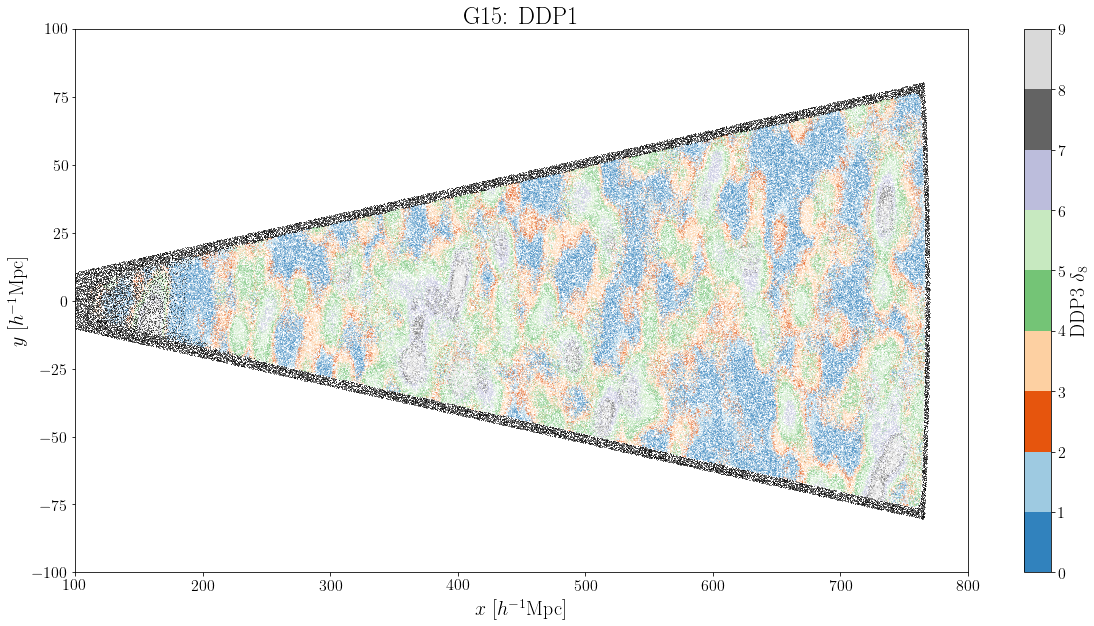

In [36]:
slice_limit = 5.

fig, ax   = plt.subplots(1,1,figsize=(20,10))

isin      = rand['FILLFACTOR'].data > 0.8

fills     = rand['DDP1_DELTA8_TIER'].data[isin]
pos_slice = pos[isin]

lims      = np.sort(pos_slice[:,2])

print(lims[0], lims[-1])

fills     = fills[np.abs(pos_slice[:,2]) < slice_limit]
pos_slice = pos_slice[np.abs(pos_slice[:,2]) < slice_limit]
    
mm = ax.scatter(pos_slice[:,0],\
           pos_slice[:,1],\
           c=fills,\
           marker='.',\
           lw=0.0,\
           s=2,\
           cmap=cmap,\
           norm=norm)

isin      = rand['FILLFACTOR'].data < 0.8
pos_slice = pos[isin]

ax.scatter(pos_slice[:,0][np.abs(pos_slice[:,2]) < slice_limit],\
           pos_slice[:,1][np.abs(pos_slice[:,2]) < slice_limit],\
           c='k',\
           marker='.',\
           lw=0.0,\
           s=2,\
           alpha=0.75)

ax.set_xlabel('$x$ [$h^{-1}$Mpc]')
ax.set_ylabel('$y$ [$h^{-1}$Mpc]')

ax.set_xlim(100.,  800.)
ax.set_ylim(-100., 100.)
    
fig.colorbar(label='DDP{}  $\delta_8$'.format(idx), ax=ax, mappable=mm)
    
ax.set_title('{}:  DDP1'.format(field))

-33.513996512412724 33.624856507988305


Text(0.5, 1.0, 'G15:  DDP1')

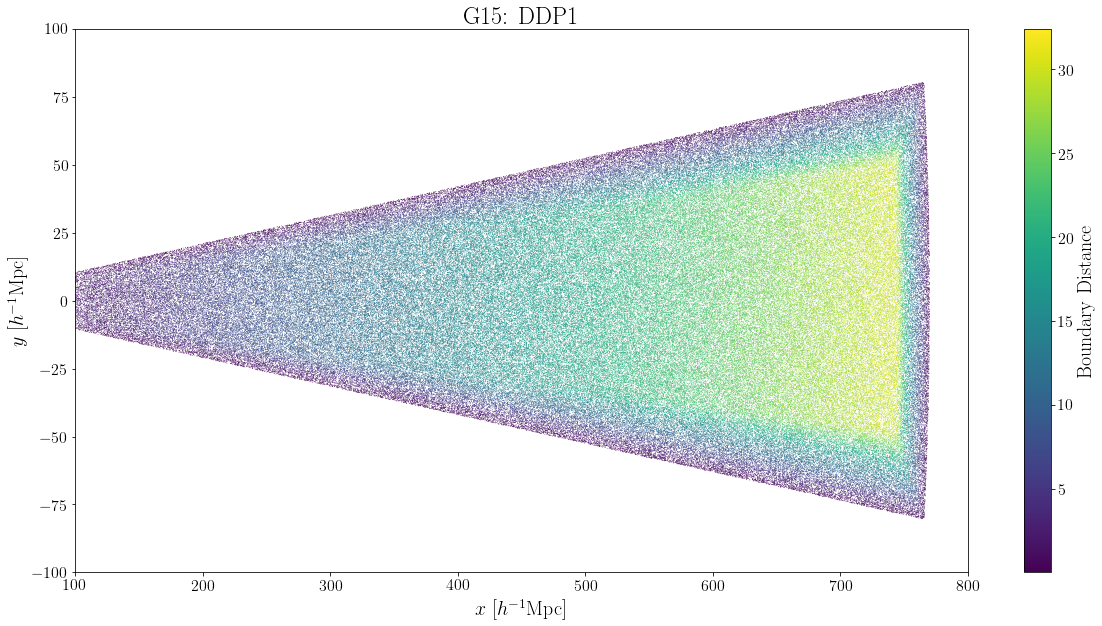

In [37]:
fig, ax   = plt.subplots(1,1,figsize=(20,10))

isin      = rand['FILLFACTOR'].data > 0.0

fills     = rand['BOUND_DIST'].data[isin]
pos_slice = pos[isin]

lims      = np.sort(pos_slice[:,2])

print(lims[0], lims[-1])

fills     = fills[np.abs(pos_slice[:,2]) < 5.]
pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
mm = ax.scatter(pos_slice[:,0],\
           pos_slice[:,1],\
           c=fills,\
           marker='.',\
           lw=0.0,\
           s=2)

ax.set_xlabel('$x$ [$h^{-1}$Mpc]')
ax.set_ylabel('$y$ [$h^{-1}$Mpc]')

ax.set_xlim(100.,  800.)
ax.set_ylim(-100., 100.)
    
fig.colorbar(label='Boundary Distance'.format(idx), ax=ax, mappable=mm)
    
ax.set_title('{}:  DDP1'.format(field))

-33.513996512412724 33.624856507988305


Text(0.5, 1.0, 'G15:  DDP1')

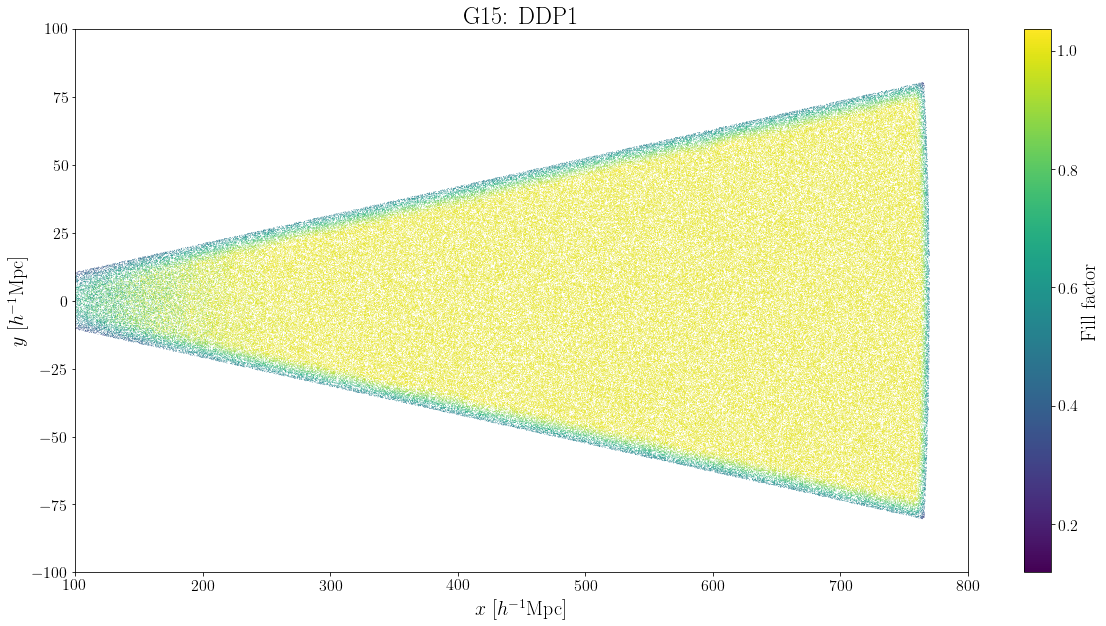

In [38]:
fig, ax   = plt.subplots(1,1,figsize=(20,10))

isin      = rand['FILLFACTOR'].data > 0.0

fills     = rand['FILLFACTOR'].data[isin]
pos_slice = pos[isin]

lims      = np.sort(pos_slice[:,2])

print(lims[0], lims[-1])

fills     = fills[np.abs(pos_slice[:,2]) < 5.]
pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
mm = ax.scatter(pos_slice[:,0],\
           pos_slice[:,1],\
           c=fills,\
           marker='.',\
           lw=0.0,\
           s=2)

ax.set_xlabel('$x$ [$h^{-1}$Mpc]')
ax.set_ylabel('$y$ [$h^{-1}$Mpc]')

ax.set_xlim(100.,  800.)
ax.set_ylim(-100., 100.)
    
fig.colorbar(label='Fill factor'.format(idx), ax=ax, mappable=mm)
    
ax.set_title('{}:  DDP1'.format(field))

Text(0, 0.5, 'DDP1 $\\delta_8$')

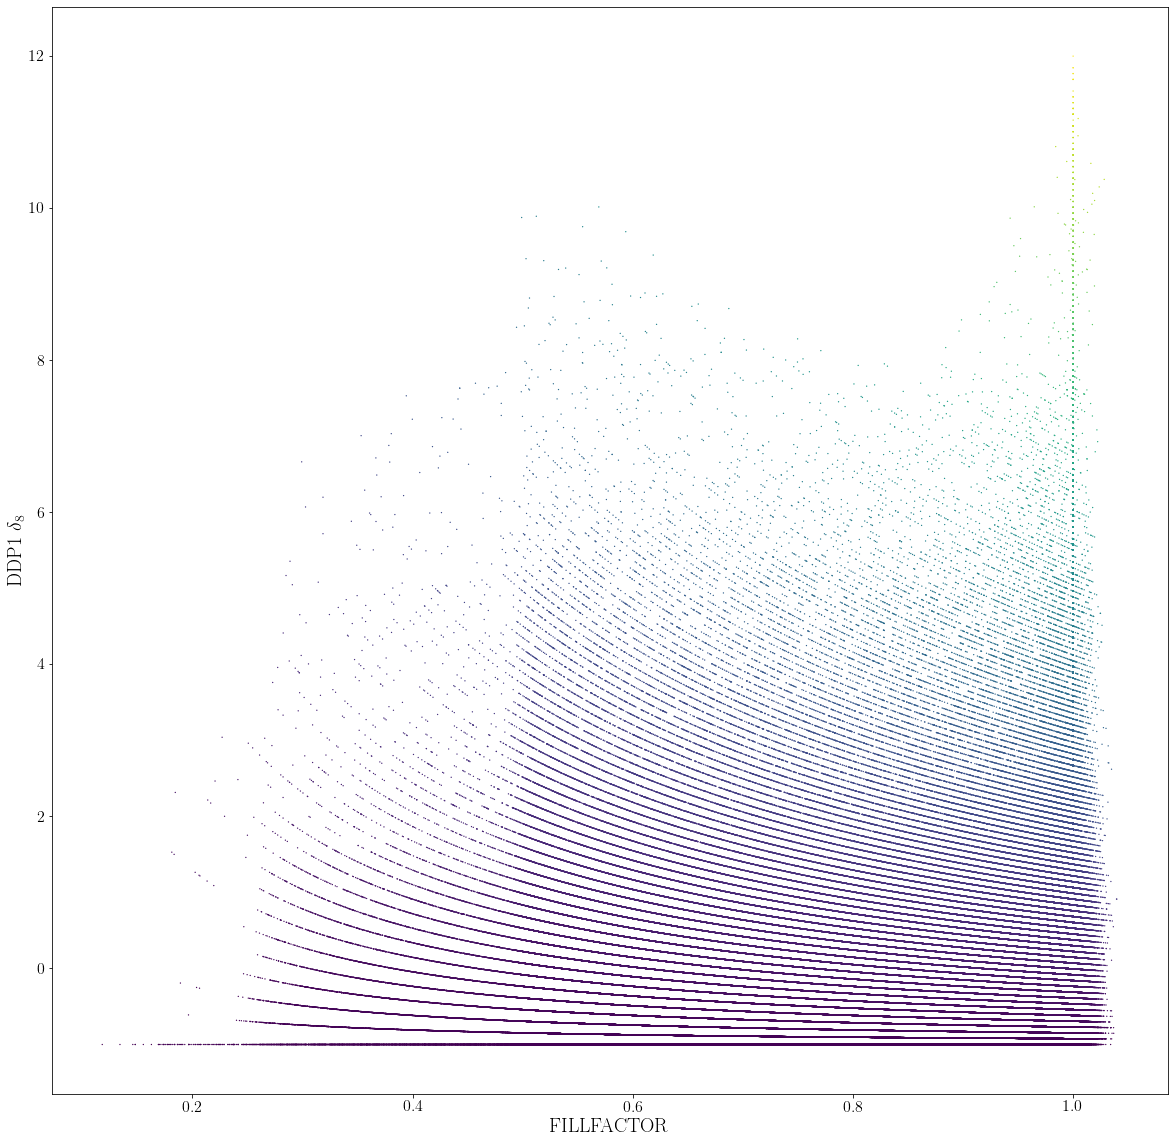

In [39]:
fig, ax = plt.subplots(1,1,figsize=(20,20))

ax.scatter(rand['FILLFACTOR'], rand['DDP1_DELTA8'], marker='.', lw=0.0, c=rand['DDP1_N8'], s=7)

ax.set_xlabel('FILLFACTOR')
ax.set_ylabel('DDP1 $\delta_8$')

Text(0, 0.5, 'DDP2 $\\delta_8$')

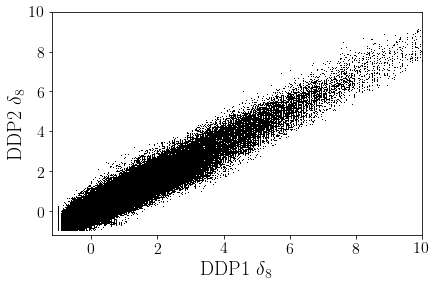

In [40]:
# Larger minimum redshift & Smaller maximum redshift. 
isin = (rand['Z'] > gold.meta['DDP1_ZMIN']) & (rand['Z'] < gold.meta['DDP2_ZMAX'])

pl.plot(rand['DDP1_DELTA8'][isin], rand['DDP2_DELTA8'][isin], marker=',', lw=0.0, c='k')

pl.xlim(-1.2, 10.)
pl.ylim(-1.2, 10.)

pl.xlabel('DDP1 $\delta_8$')
pl.ylabel('DDP2 $\delta_8$')

In [41]:
rand_ddp1fill = np.clip(np.sort(rand[rand['IN_DDP1']]['FILLFACTOR'].data)[::-1], 0, 1) 
rand_ddp2fill = np.clip(np.sort(rand[rand['IN_DDP2']]['FILLFACTOR'].data)[::-1], 0, 1)
rand_ddp3fill = np.clip(np.sort(rand[rand['IN_DDP3']]['FILLFACTOR'].data)[::-1], 0, 1)

KeyError: 'IN_DDP1'

In [ ]:
plt.plot(rand_ddp1fill, np.cumsum(rand_ddp1fill) / len(rand_ddp1fill), lw=1, color='blue',  label=r'${:.3f} \leq z \leq {:.3f}$'.format(rand.meta['DDP1_ZMIN'], rand.meta['DDP1_ZMAX']))
plt.plot(rand_ddp2fill, np.cumsum(rand_ddp2fill) / len(rand_ddp2fill), lw=1, color='green', label=r'${:.3f} \leq z \leq {:.3f}$'.format(rand.meta['DDP2_ZMIN'], rand.meta['DDP2_ZMAX']))
plt.plot(rand_ddp3fill, np.cumsum(rand_ddp3fill) / len(rand_ddp3fill), lw=1, color='red',   label=r'${:.3f} \leq z \leq {:.3f}$'.format(rand.meta['DDP3_ZMIN'], rand.meta['DDP3_ZMAX']))

plt.xlabel('Fill factor')
plt.ylabel(r'Volume fraction ($\geq$ Fill factor)')

pl.xlim(0.0, 1.05)
pl.ylim(0.0, 1.05)

plt.legend(frameon=False, loc=1)

# Done.